In [7]:
import os
import glob
from pathlib import Path

import json
import csv
import numpy as np
import pandas as pd 
import sklearn as sk 
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib notebook
import mplcursors
from ipywidgets import widgets

In [8]:
os.getcwd()
os.listdir('./transformed-data/')

['ChartingProjectSparsity.json', 'augmented_player_overview.csv', 'aggdf.csv']

In [9]:
filepath = "./transformed-data/aggdf.csv"
df = pd.read_csv(filepath)
print(df.head())

          player    aces  bk_pts  bp_saved  crosscourt     deep     dfs  \
0    Jiri_Hrebec    28.0    34.0      16.0       332.0    343.0    15.0   
1     Bjorn_Borg   675.0   367.0     224.0      5118.0   5920.0   386.0   
2     Ivan_Lendl  4294.0  1756.0    1054.0     23332.0  31707.0  1693.0   
3   Kevin_Curren   329.0   102.0      78.0       172.0   1158.0   105.0   
4  Stefan_Edberg  5017.0  2496.0    1514.0     16768.0  39661.0  2827.0   

   down_middle  down_the_line  err_deep  ...  snv_pts  total_shots  unforced  \
0        190.0           72.0       7.0  ...    258.0       8278.0     364.0   
1       2475.0         1547.0     287.0  ...   3974.0     110513.0    7091.0   
2      12876.0         6930.0     887.0  ...  17976.0     525979.0   25959.0   
3        140.0          124.0      70.0  ...   1076.0      17937.0     884.0   
4       8244.0         6522.0    1456.0  ...  26030.0     564545.0   32955.0   

   unforced_bh  unforced_fh  unret  very_deep  winners  winners_bh  

In [10]:
# split data
X = df.loc[:, df.columns != 'player']
labels = df['player']


#umap cluster
umap = umap.UMAP(n_components = 2)
data = umap.fit_transform(X)

In [11]:
# search dashboard
text = widgets.Text()
display(text)

def handle_submit(sender):
    idx = labels[labels==text.value]
    point = None
    if(len(idx)>0):
        pointidx = idx.index[0]
        point = data[pointidx]
    print(text.value,": ",point)

text.on_submit(handle_submit)

Text(value='')

<IPython.core.display.Javascript object>


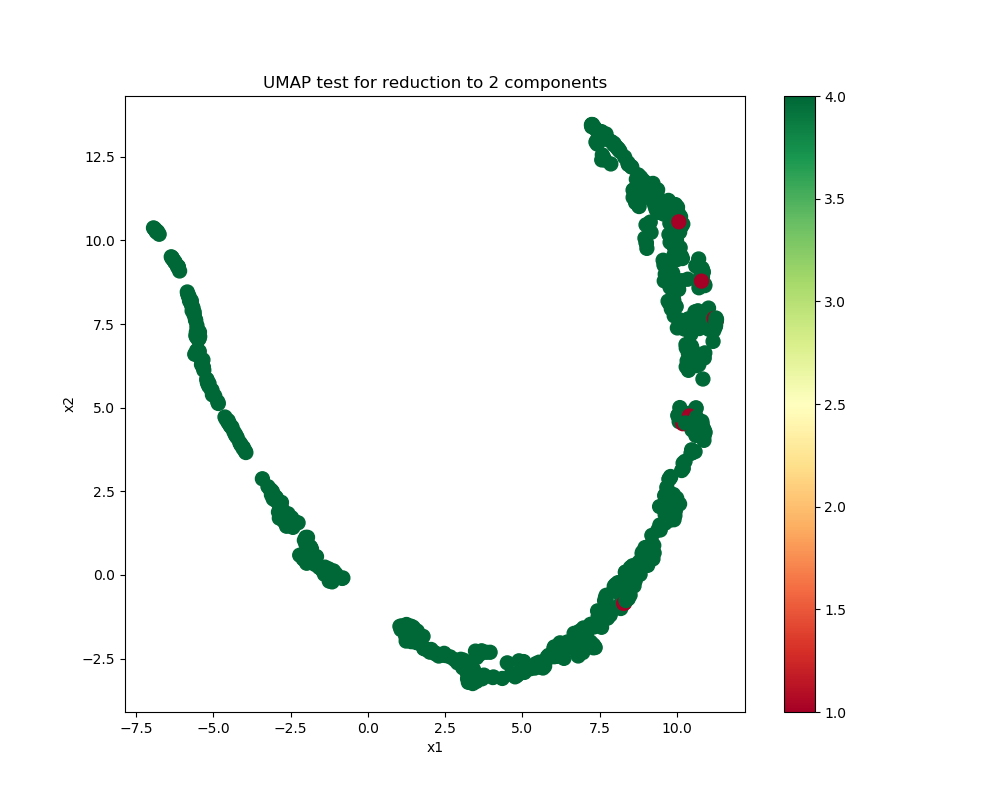

In [19]:
#plot data
x = data[:,0]
y = data[:,1]
names = labels
c = X['aces'].to_numpy() #np.random.randint(1,5,size=len(x))

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
fig.set_size_inches(10,8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('UMAP test for reduction to 2 components')
axp = plt.show()
plt.colorbar(axp)


references
<br>
https://stackoverflow.com/questions/17551193/r-color-scatter-plot-points-based-on-values
<br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colorbar.html
<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html
<br>